# 1) Introduction to data

The primary aim of this analysis is to assess the repercussions of the COVID-19 pandemic on the labor market in India.Here we'll be using a comprehensive dataset encompassing the unemployment rates across all states in India. This dataset comprises essential variables, including States, Date, Frequency, Estimated Unemployment Rate (%), Estimated Employed, and Estimated Labour Participation Rate (%).

# 2) Libraries Required

In [1]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
data=pd.read_csv("Unemployment in India.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## Basic Information about dataset

In [4]:
data.shape

(768, 7)

In [5]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [6]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.duplicated().any()

False

In [10]:
data.Region.value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [11]:
data.shape

(740, 7)

## Renaming the attributes

In [12]:
# updating column names
data.columns = ['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','area']

In [13]:
data.tail()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


## Changing the data type of date attribute

In [14]:
data['date']=pd.to_datetime(data['date'],dayfirst=True)

In [26]:
data['month_int']=data['date'].dt.month
data.head(10)

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation,area,month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9
5,Andhra Pradesh,2019-10-31,Monthly,3.52,12017412.0,43.01,Rural,10
6,Andhra Pradesh,2019-11-30,Monthly,4.12,11397681.0,41.00,Rural,11
7,Andhra Pradesh,2019-12-31,Monthly,4.38,12528395.0,45.14,Rural,12
8,Andhra Pradesh,2020-01-31,Monthly,4.84,12016676.0,43.46,Rural,1
9,Andhra Pradesh,2020-02-29,Monthly,5.91,11723617.0,42.83,Rural,2


<Axes: >

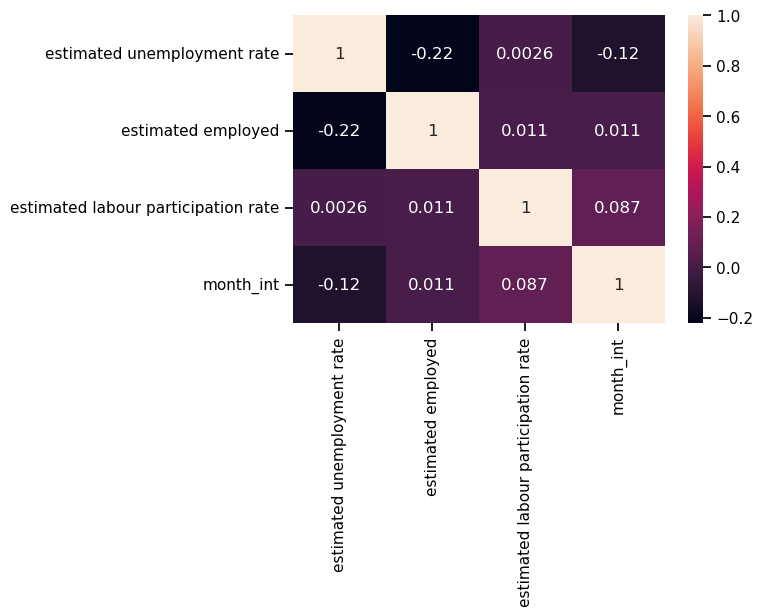

In [17]:
heatmap= data[['estimated unemployment rate', 'estimated employed', 'estimated labour participation rate', 'area','month_int']]
heatmap = heatmap.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=heatmap, annot=True)

## Unemployment Rate Analysis: Data Visualisation

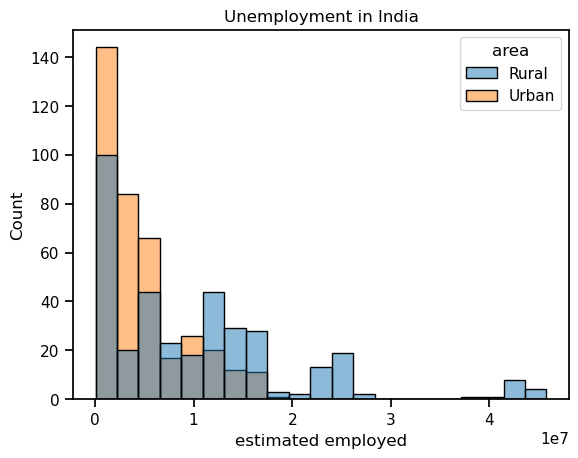

In [19]:
# estimated employees acc. to different areas of India
data.columns = ["state", "date","frequency","estimated unemployment rate", "estimated employed","estimated labour participation","area","month_int"]
plt.title("Unemployment in India")
sns.histplot(x="estimated employed", hue="area", data=data)
plt.show()

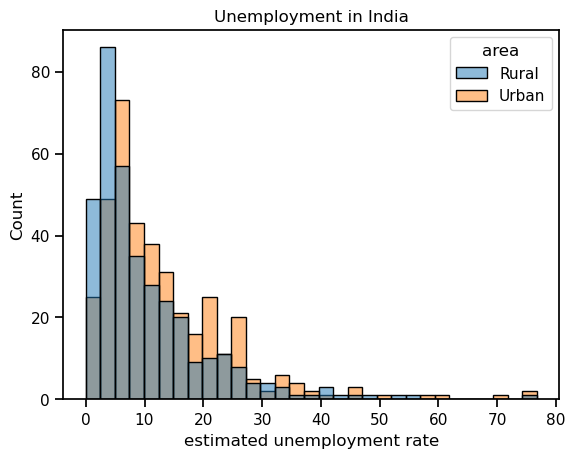

In [20]:
# unemployment rate acc.to different areas of India
data.columns = ["state", "date","frequency","estimated unemployment rate", "estimated employed","estimated labour participation","area","month_int"]
plt.title("Unemployment in India")
sns.histplot(x="estimated unemployment rate", hue="area", data=data)
plt.show()

In [21]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [22]:
#Boxplot of Unemployment rate per States
fig = px.box(data, x='state', y='estimated unemployment rate', color='state', title='Unemployment rate per States', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [23]:
#Bar chart displaying the average unemployment rate in each state, color-coded by state.
plot_ump = data[['estimated unemployment rate', 'state']]
data_unemp = plot_ump.groupby('state').mean().reset_index()
data_unemp = data_unemp.sort_values('estimated unemployment rate')
fig = px.bar(data_unemp, x='state', y='estimated unemployment rate', color='state',
             title='Average Unemployment Rate in each state')
fig.show()

In [24]:
# creating dashboard to analyze the unemployment rate of each Indian state by area.
unemploment = data[["state", "area", "estimated unemployment rate"]]
figure = px.sunburst(unemploment, path=["area", "state"], 
                     values="estimated unemployment rate", 
                     width=500, height=500, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

In [27]:
#data representation before and after the lockdown
after_lockdown = data[(data['month_int'] >= 4) & (data['month_int'] <=6)]
before_lockdown = data[(data['month_int'] >= 1) & (data['month_int'] <=4)]

af_lockdown=after_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown= before_lockdown.groupby('state')['estimated unemployment rate'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['estimated unemployment rate']

lockdown.columns=['state','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,state,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,10.756250,11.126000
1,Assam,6.750000,6.563333
2,Bihar,23.690000,27.459000
3,Chandigarh,19.366667,12.656667
4,Chhattisgarh,9.028750,12.720000


In [30]:
#Unemployment rate change after lockdown
lockdown['rate change in unemployment']=round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']
                                             /lockdown['unemployment rate after lockdown'],2)

In [33]:
# visualisation of percentage of rate change of unemployment after lockdown
import plotly.express as px

fig = px.bar(lockdown, x='state', y='rate change in unemployment', title="% change in unemployment after lockdown",color='rate change in unemployment', template="ggplot2")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

## States/UTs that are most affected by rate change in unemployment due to COVID

1) Tripura

2) Haryana

3) Bihar

4) Jharkhand

5) Puducherry
